In [1]:
from pathlib import Path 
import pandas as pd 
import tarfile 
import urllib.request

# Get Data

In [2]:
def load_hoursing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)         
        url = "https://github.com/ageron/data/raw/main/housing.tgz"         
        urllib.request.urlretrieve(url, tarball_path)         
        with tarfile.open(tarball_path) as housing_tarball:             
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

In [3]:
housing = load_hoursing_data()

# Data Profiling

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


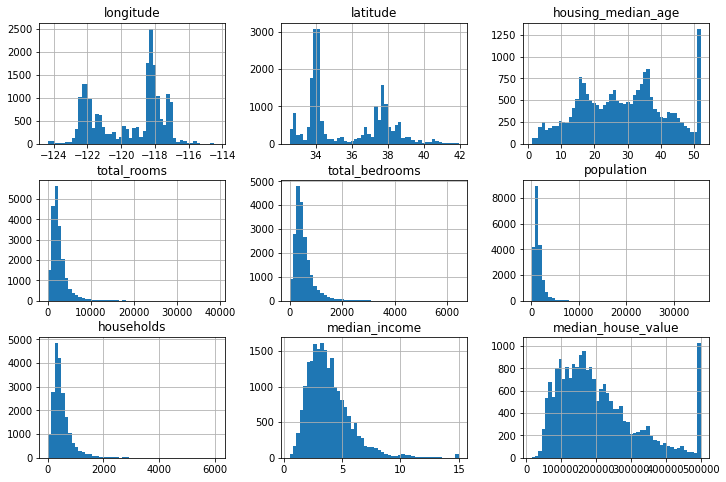

In [10]:
import matplotlib.pyplot as plt  
housing.hist(bins=50, figsize=(12, 8)) 
plt.show()

# Create test dataset

In [16]:
# Option 1
import numpy as np
def shuffle_and_split_data(data:pd.DataFrame, test_ratio:float):
    # make sure we can replicate the value again
    np.random.seed = 42
    # randomly create numbers as index used later based on the number of data rows
    shuffled_indices = np.random.permutation(len(data))
    # calculate the size of the test data set
    test_set_size = int(len(data) * test_ratio)
    # select the first n (n=test_set_size) index as data set
    test_indices = shuffled_indices[:test_set_size]
    # select the rest of index as data set
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [17]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)

In [18]:
train_set.shape

(16512, 10)

In [19]:
test_set.shape

(4128, 10)

In [26]:
from zlib import crc32  
def is_id_in_test_set(identifier, test_ratio):     
    return crc32(np.int64(identifier)) < test_ratio * 2**32  

def split_data_with_id_hash(data, test_ratio, id_column):     
    ids = data[id_column]     
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))     
    return data.loc[~in_test_set], data.loc[in_test_set]

In [43]:
m = [i for i in range(10000)]

In [49]:
is_id_in_test_set(2,0.2)

True

In [56]:
0.2 * 2**32 

858993459.2

In [55]:
crc32(np.int64(2))

654825492

In [53]:
crc32(np.int64(3))

3954038922

In [64]:
crc32(np.int64(4))

3781742995

In [61]:
crc32(np.int64(5))

767742221

In [45]:
for i in m:
    if is_id_in_test_set(i, 0.2):
        print(i, is_id_in_test_set(i, 0.2))

2 True
5 True
12 True
16 True
23 True
25 True
30 True
35 True
36 True
42 True
45 True
49 True
54 True
56 True
66 True
69 True
75 True
76 True
80 True
89 True
94 True
100 True
106 True
109 True
113 True
118 True
120 True
127 True
137 True
142 True
146 True
149 True
155 True
156 True
161 True
166 True
168 True
175 True
186 True
189 True
192 True
199 True
201 True
206 True
210 True
213 True
225 True
230 True
243 True
244 True
250 True
253 True
257 True
262 True
264 True
271 True
275 True
282 True
285 True
295 True
297 True
302 True
306 True
309 True
315 True
316 True
321 True
326 True
339 True
340 True
346 True
349 True
352 True
359 True
361 True
366 True
370 True
373 True
379 True
387 True
388 True
394 True
397 True
401 True
406 True
418 True
421 True
432 True
439 True
441 True
446 True
458 True
461 True
465 True
470 True
472 True
479 True
482 True
485 True
491 True
492 True
505 True
510 True
520 True
527 True
531 True
532 True
538 True
541 True
544 True
551 True
553 True
558 True
571 Tr

In [47]:
n = [i for i in range(20000)]

In [48]:
for i in n:
    if is_id_in_test_set(i, 0.2):
        print(i, is_id_in_test_set(i, 0.2))

2 True
5 True
12 True
16 True
23 True
25 True
30 True
35 True
36 True
42 True
45 True
49 True
54 True
56 True
66 True
69 True
75 True
76 True
80 True
89 True
94 True
100 True
106 True
109 True
113 True
118 True
120 True
127 True
137 True
142 True
146 True
149 True
155 True
156 True
161 True
166 True
168 True
175 True
186 True
189 True
192 True
199 True
201 True
206 True
210 True
213 True
225 True
230 True
243 True
244 True
250 True
253 True
257 True
262 True
264 True
271 True
275 True
282 True
285 True
295 True
297 True
302 True
306 True
309 True
315 True
316 True
321 True
326 True
339 True
340 True
346 True
349 True
352 True
359 True
361 True
366 True
370 True
373 True
379 True
387 True
388 True
394 True
397 True
401 True
406 True
418 True
421 True
432 True
439 True
441 True
446 True
458 True
461 True
465 True
470 True
472 True
479 True
482 True
485 True
491 True
492 True
505 True
510 True
520 True
527 True
531 True
532 True
538 True
541 True
544 True
551 True
553 True
558 True
571 Tr